# Data Preprocessing


##### Downloading dataset


In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
od.download(
    'https://www.kaggle.com/datasets/shariful07/student-mental-health/data')

In [3]:
dataset = pd.read_csv("student-mental-health\\Student Mental health.csv")
dataset.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# Dropping timestamp column
dataset = dataset.drop("Timestamp", axis=1)

In [28]:
# Renaming columns
dataset.rename(columns={'Choose your gender': 'Gender', 'What is your course?': 'Course', 'Your current year of Study': 'Study Year', 'What is your CGPA?': 'CGPA', 'Marital status': 'Marital Status',
               'Do you have Depression?': 'Depression', 'What is your course?': 'Course', 'Do you have Anxiety?': 'Anxiety', 'Do you have Panic attack?': 'Panic Attack', 'Did you seek any specialist for a treatment?': 'Counselling'}, inplace=True)

In [29]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Counselling
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [30]:
# Processing gender column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Filling empty cells with value "Female"
dataset['Gender'].fillna('Female', inplace=True)
dataset['Gender'] = label_encoder.fit_transform(
    dataset['Gender'])
print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
Female: 0
Male: 1


In [31]:
# Processing age column
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)
# Round the mean value to the nearest integer (optional)
mean_age = round(mean_age)
# Convert the 'Age' column to integers
dataset['Age'] = dataset['Age'].astype(int)

In [33]:
# Processing course column

import openai
import time

# Set your OpenAI GPT-3 API key
openai.api_key = ''


def categorize_course_with_gpt3(course):
    # Construct a prompt for GPT-3 to perform a web search
    prompt = f"Select the field of this course {course} from these given fields. Do not reply anything else than the given feilds. Reply only the strings of field:\n" \
             "Arts and Humanities\n" \
             "Social Sciences\n" \
             "Natural Sciences\n" \
             "Engineering and Technology\n" \
             "Health Sciences\n" \
             "Business and Economics\n" \
             "Law\n" \
             "Religious Studies\n" \
             "Agriculture and Environmental Studies\n" \
             "Interdisciplinary Studies\n" \
             "Communication and Media\n" \
             "Computer and Information Sciences\n" \
             "Physical Education and Sports Sciences\n" \
             "Mathematics and Statistics\n" \
             "Public Policy and Administration\n" \
             "Interdisciplinary and General Education\n"

    # Make an API call to GPT-3 using the chat completion endpoint
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150  # Adjust as needed
    )
    return response["choices"][0]["message"]["content"]


# Set the rate limit variables
requests_limit = 3
wait_time = 60

# Iterate over the DataFrame and update values
for index, row in dataset.iterrows():
    current_value = row['Course']
    if pd.notna(current_value):
        updated_value = categorize_course_with_gpt3(current_value)
        dataset.at[index, 'Course'] = updated_value
        print(updated_value)
    else:
        dataset.at[index, 'Course'] = "General Studies"
        print("General Studies")

    # Check if 3 requests have been made and introduce a wait
    if (index + 1) % requests_limit == 0 and index != 0:
        print(f"Waiting for {wait_time} seconds...")
        time.sleep(wait_time)

Engineering and Technology
Religious Studies
Computer and Information Sciences
Waiting for 60 seconds...
Law
Mathematics and Statistics
Engineering and Technology
Waiting for 60 seconds...
Religious Studies
Computer and Information Sciences
Business and Economics
Waiting for 60 seconds...
Interdisciplinary Studies
Social Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Engineering and Technology
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Agriculture and Environmental Studies
Engineering and Technology
Waiting for 60 seconds...
Communication and Media
Computer and Information Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Engineering and Technology
Computer and Infor

In [34]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Counselling
0,0,18,Engineering and Technology,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,1,21,Religious Studies,year 2,3.00 - 3.49,No,No,Yes,No,No
2,1,19,Computer and Information Sciences,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,0,22,Law,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,1,23,Mathematics and Statistics,year 4,3.00 - 3.49,No,No,No,No,No


In [35]:
# Processing course column -- continue

dataset['Course'] = label_encoder.fit_transform(
    dataset['Course'])

print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
Agriculture and Environmental Studies: 0
Arts and Humanities: 1
Business and Economics: 2
Communication and Media: 3
Computer and Information Sciences: 4
Engineering and Technology: 5
Health Sciences: 6
Interdisciplinary Studies: 7
Law: 8
Mathematics and Statistics: 9
Religious Studies: 10
Social Sciences: 11


In [ ]:
# Processing Your current year of Study column

label_mapping_year = {
    "year 1": 0,
    "year 2": 1,
    "year 3": 2,
    "year 4": 3
}

# Clean up column values by converting to lowercase and removing leading and trailing spaces
dataset['Study Year'] = dataset['Study Year'].str.lower().str.strip()

# Apply label encoding using a for loop with a check for matching characters
dataset['Study Year'] = [next((label_mapping_year[label] for label in label_mapping_year if all(
    char in year for char in label)), None) for year in dataset['Study Year']]

In [41]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Counselling
0,0,18,5,0,3.00 - 3.49,No,Yes,No,Yes,No
1,1,21,10,1,3.00 - 3.49,No,No,Yes,No,No
2,1,19,4,0,3.00 - 3.49,No,Yes,Yes,Yes,No
3,0,22,8,2,3.00 - 3.49,Yes,Yes,No,No,No
4,1,23,9,3,3.00 - 3.49,No,No,No,No,No


In [42]:
# Processing course CGPA column

label_mapping = {
    "0-1.99": 0,
    "2.00-2.49": 1,
    "2.50-2.99": 2,
    "3.00-3.49": 3,
    "3.5-4.00": 4
}

# Clean up column values by removing leading and trailing spaces
dataset['CGPA'] = dataset['CGPA'].str.strip()

# Apply label encoding using a for loop with a check for matching characters
dataset['CGPA'] = [next((label_mapping[label] for label in label_mapping if all(
    char in cgpa for char in label)), None) for cgpa in dataset['CGPA']]

In [44]:
# Processing martial status column

dataset['Marital Status'] = label_encoder.fit_transform(
    dataset['Marital Status'])

print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [46]:
# Processing Do you have Depression? column

dataset['Depression'] = label_encoder.fit_transform(
    dataset['Depression'])

print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [47]:
# Processing Do you have Anxiety? column

dataset['Anxiety'] = label_encoder.fit_transform(
    dataset['Anxiety'])

print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [48]:
# Processing Do you have Panic attack? column

dataset['Panic Attack'] = label_encoder.fit_transform(
    dataset['Panic Attack'])
print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [49]:
# Processing Did you seek any specialist for a treatment? column

dataset['Counselling'] = label_encoder.fit_transform(
    dataset['Counselling'])

print("Mapping of original strings to numerical labels:")
for original, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [56]:
dataset.iloc[:, 0:].to_csv("Processed Data.csv", index=False)

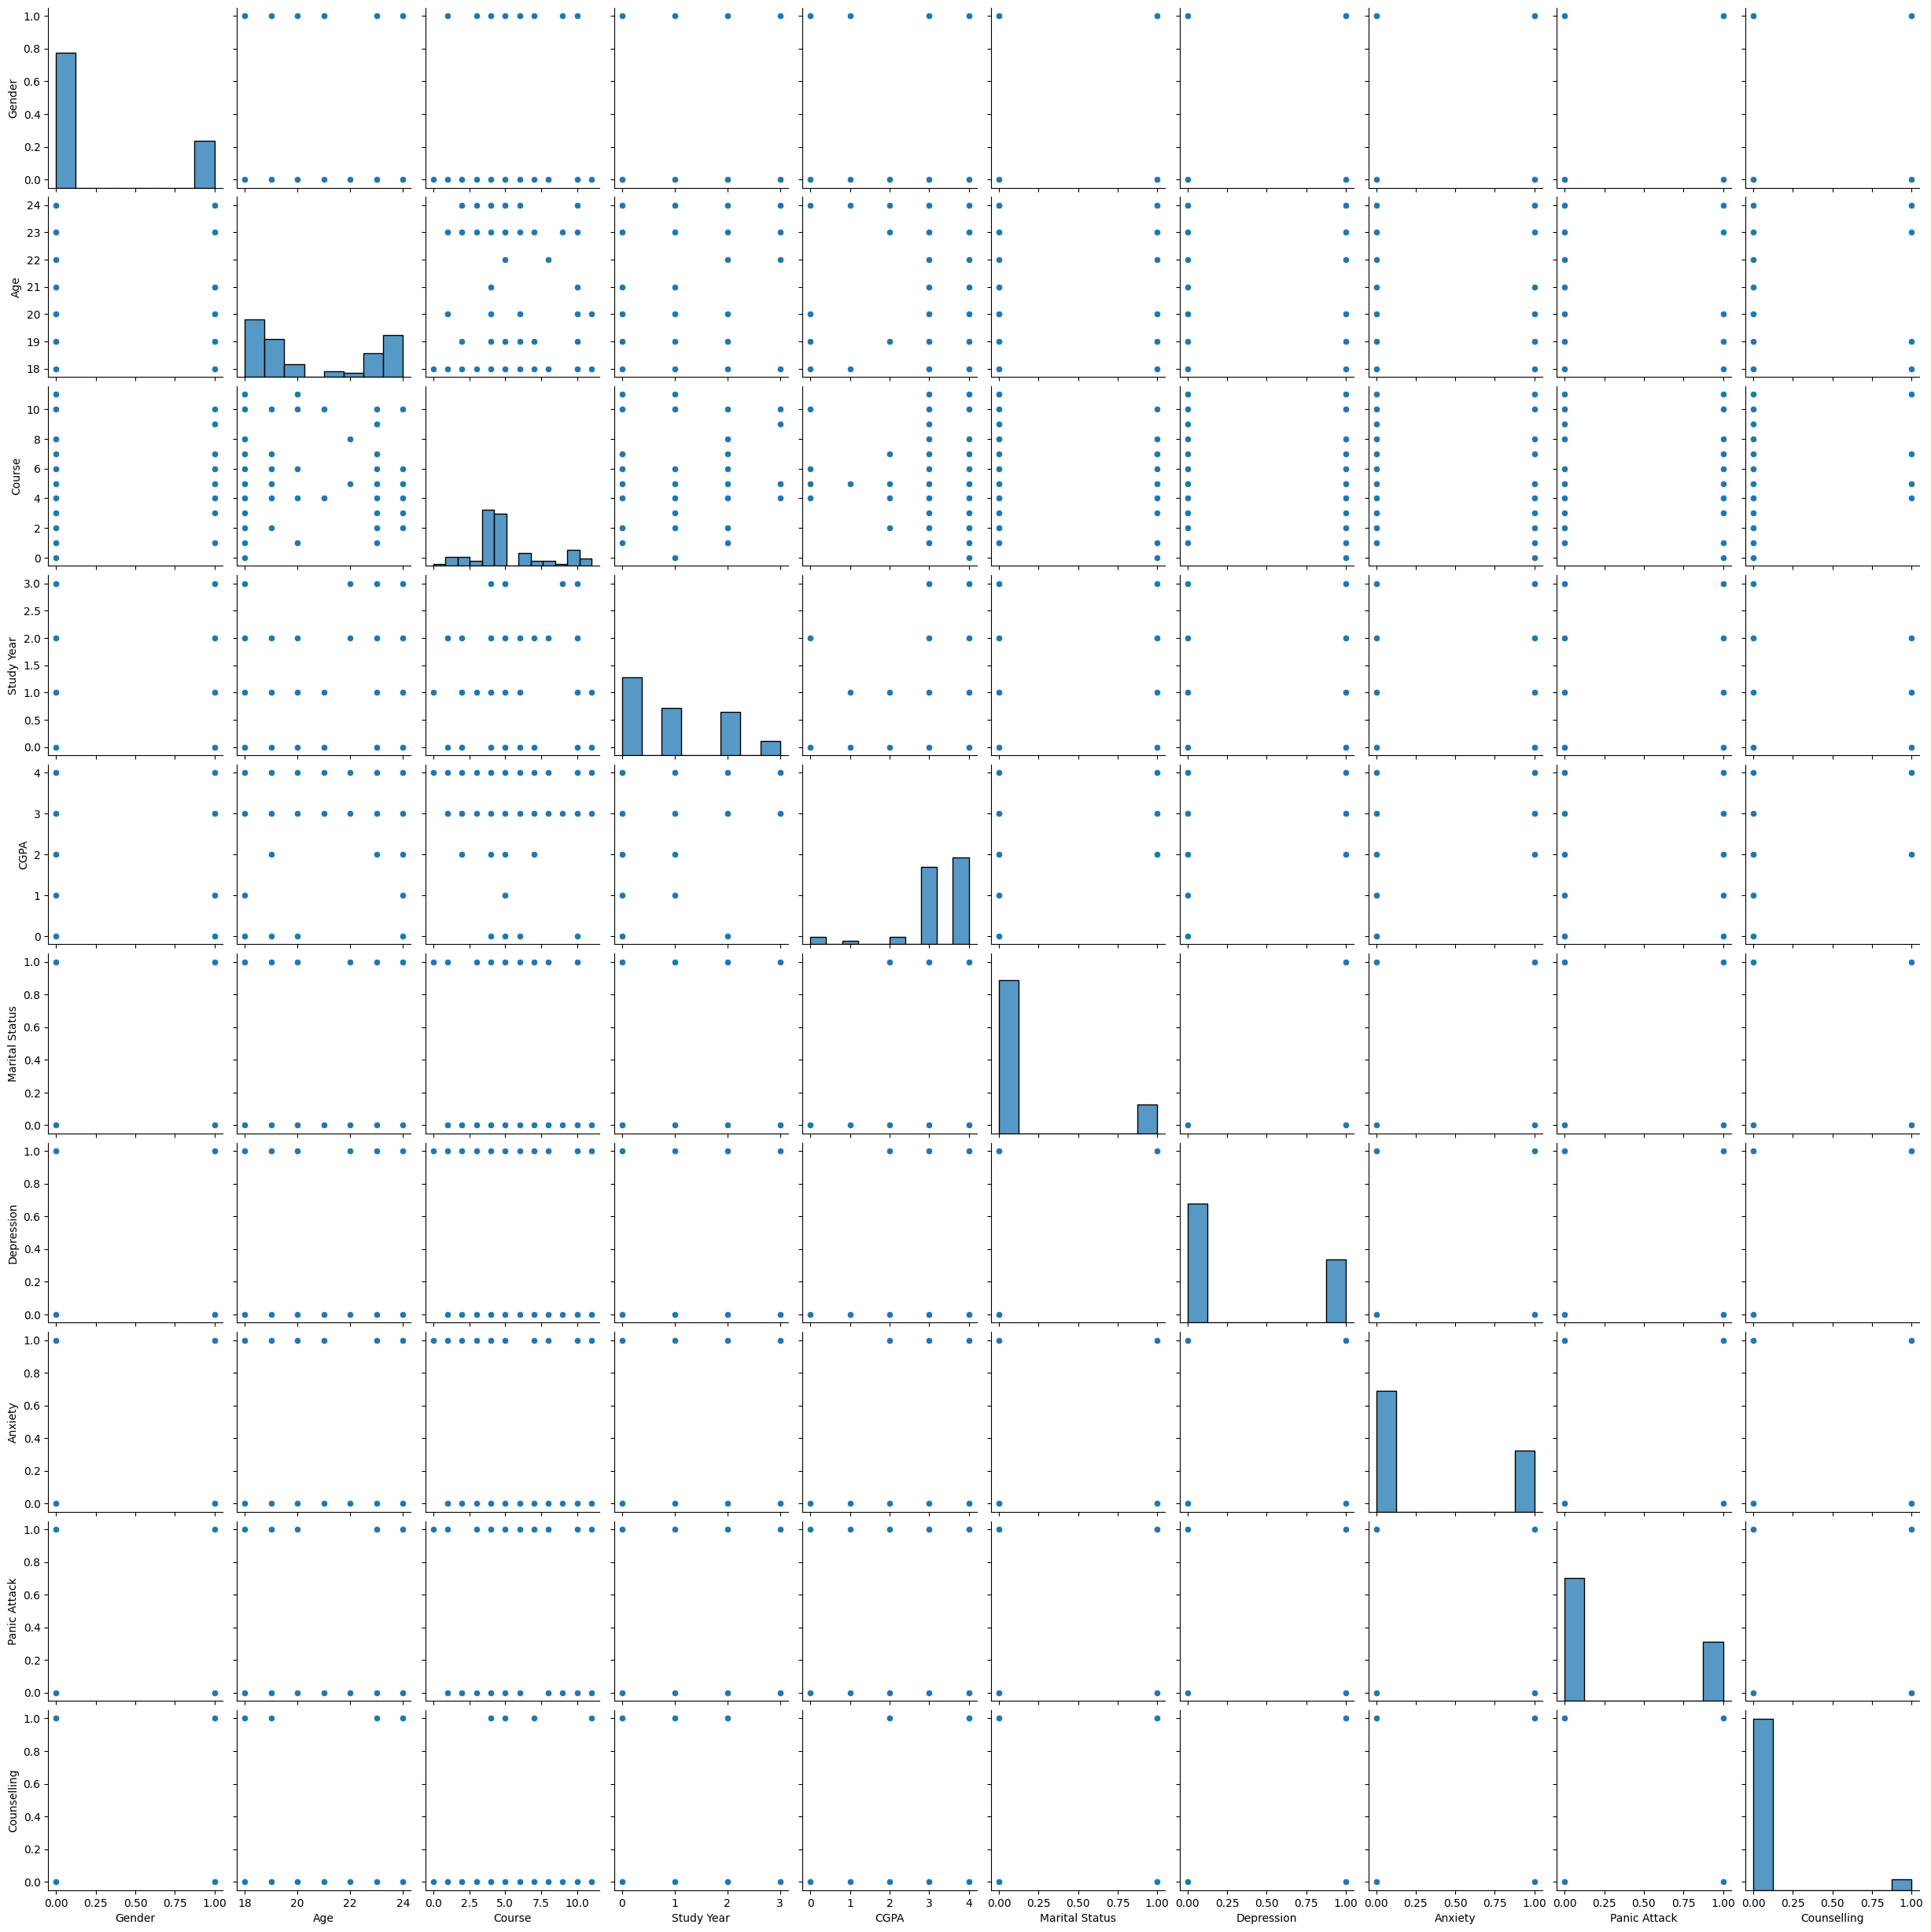

In [4]:
import seaborn as sns
import pandas as pd

dataset = pd.read_csv("Processed Data.csv")
sns.pairplot(dataset)

In [5]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Counselling
0,0,18,5,0,3,0,1,0,1,0
1,1,21,10,1,3,0,0,1,0,0
2,1,19,4,0,3,0,1,1,1,0
3,0,22,8,2,3,1,1,0,0,0
4,1,23,9,3,3,0,0,0,0,0


In [6]:
import plotly.express as px

# Calculate value counts
value_counts = dataset['Age'].value_counts()
value_counts = dataset['Study Year'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(names=value_counts.index, values=value_counts.values,
             title='Pie Chart based on age count')
fig2 = px.pie(names=value_counts.index, values=value_counts.values,
              title='Pie Chart based on study year count')

# Show the plot
fig.show()
fig2.show()

In [7]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

dataset.sort_values(by="Age", inplace=True)
plt.figure(dpi=200)
fig = px.bar(dataset, x="Depression", y="Course",
             orientation='h', color='Age')
fig.show()

<Figure size 1280x960 with 0 Axes>

- **Key Finding:** The analysis reveals a higher prevalence of depression among students pursuing computer-related degrees compared to other disciplines.

- **Age Group Impact:** Students in the midst of their degree, specifically at the age of 19-20, exhibit a higher likelihood of experiencing depression compared to other age groups.

- **Discipline Comparison:**

  - _Computer-related Degrees:_ Highest reported depression rates.
  - _Engineering and Technology Degrees:_ Second-highest depression rates.

- **Temporal Patterns in Engineering and Technology Courses:**
  - _Start of Degrees:_ Engineering and technology students show an increased likelihood of depression at the beginning of their academic journey.
  - _End of Degrees:_ Similarly, a notable prevalence of depression is observed towards the completion of their degrees.


In [8]:
# dataset.sort_values(by="Study Year", inplace=True)

x = dataset["Age"]

fig = go.Figure()

# Create and style traces

fig.add_trace(go.Scatter(x=x, y=dataset["Depression"], name='Depression', line=dict(
    color='firebrick', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Panic Attack"], name='Panic Attack', line=dict(
    color='royalblue', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Anxiety"], name='Anxiety', line=dict(
    color='black', width=4, dash='dashdot')))


# Edit the layout

fig.update_layout(title='Depressive symptoms across ages',
                  xaxis_title='Age Groups', yaxis_title='Types of issue')


fig.show()

<Axes: >

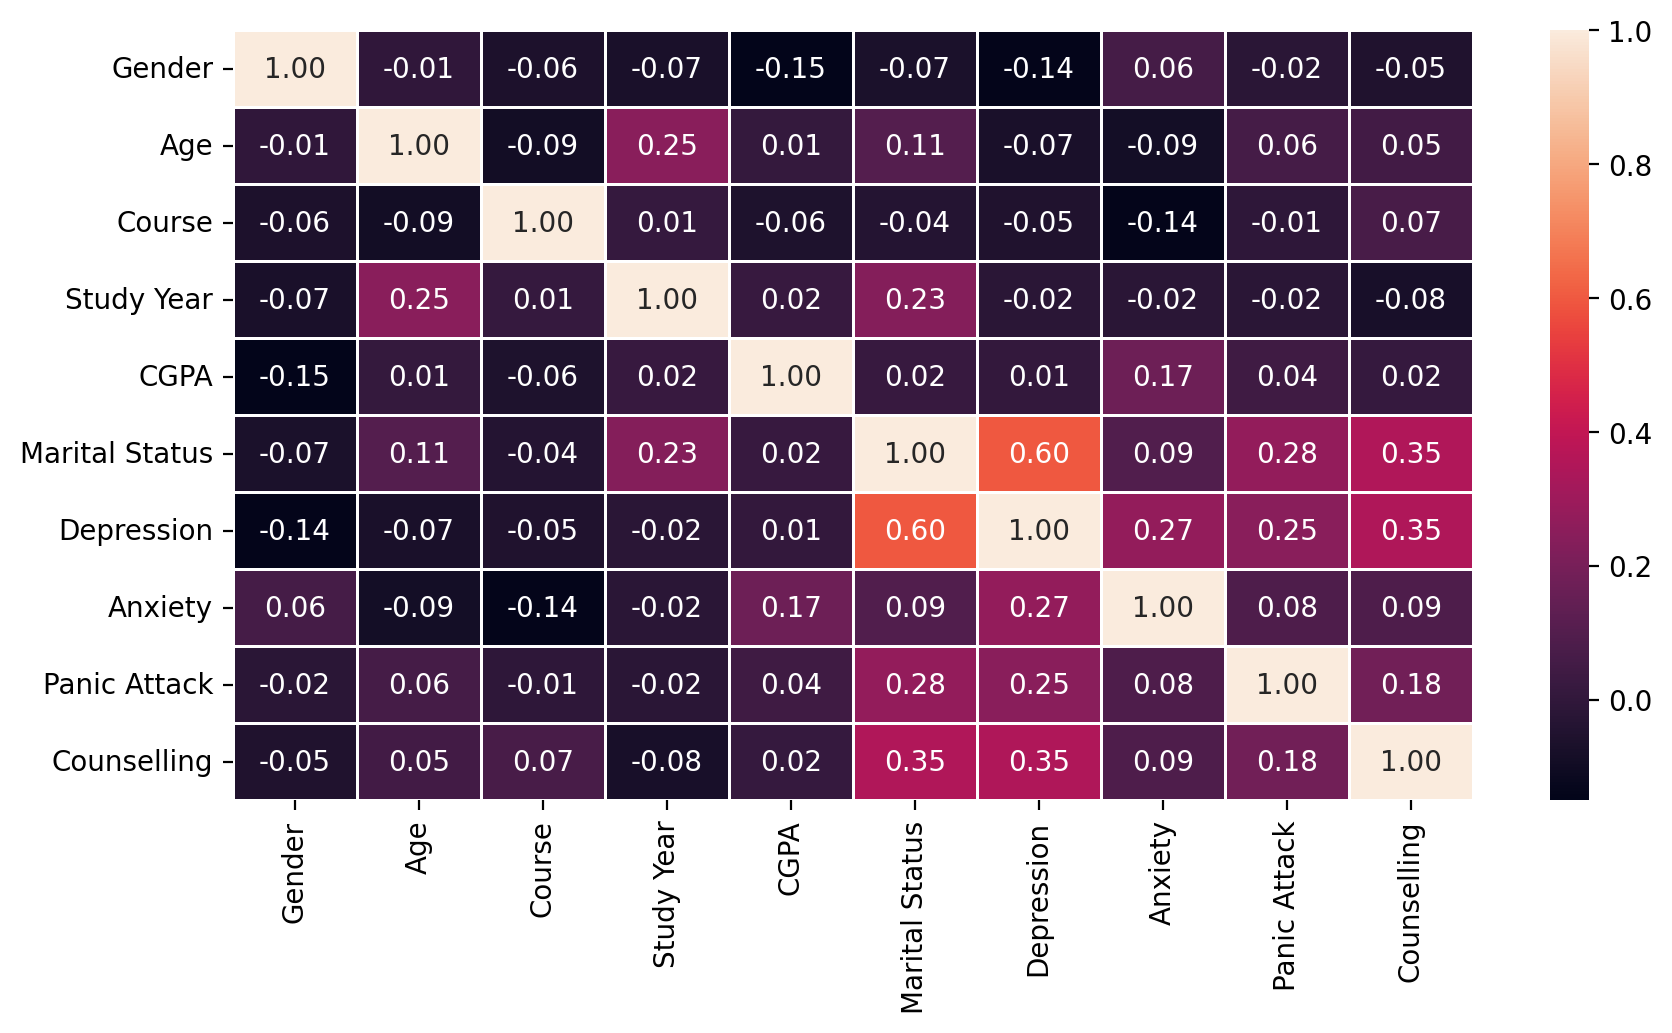

In [9]:
Corrmat = dataset.corr()
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

In [10]:
x = dataset["Age"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=dataset["Depression"],
                         name='Depression',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='Depression across ages',
                   xaxis_title='Age',
                   yaxis_title='Depression')


fig.show()

In [11]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping
tf.__version__

'2.10.1'

In [12]:
print("Num GPUs Available: ", len(
    tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Counselling
0,0,18,5,0,3,0,1,0,1,0
33,1,18,4,1,4,1,1,1,0,1
31,1,18,4,1,3,0,0,0,0,0
38,0,18,10,0,4,0,0,0,0,0
73,1,18,6,0,0,0,0,0,0,0


In [14]:
column_to_move = 'Depression'

# Move the specified column to the end
dataset = dataset[[col for col in dataset.columns if col != column_to_move] + [column_to_move]]
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Anxiety,Panic Attack,Counselling,Depression
0,0,18,5,0,3,0,0,1,0,1
33,1,18,4,1,4,1,1,0,1,1
31,1,18,4,1,3,0,0,0,0,0
38,0,18,10,0,4,0,0,0,0,0
73,1,18,6,0,0,0,0,0,0,0


In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing ANN

In [ ]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM


In [18]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
ann = Sequential()

# layers

ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 5ms/step - loss: 0.7415 - accuracy: 0.5375
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.5375
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7291 - accuracy: 0.5250
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.5250
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7181 - accuracy: 0.5375
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.5375
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.5500
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.5500
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5500
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5625
Epoch 11/100
3/3 [===========

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
import numpy as np

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1/1 [==============================] - 0s 17ms/step
[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0]
 [ 2  3]]


0.9047619047619048

In [22]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  3]
 [ 2  3]]


0.7619047619047619

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.50 %
Standard Deviation: 13.46 %


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0]
 [ 2  3]]


0.9047619047619048

C:\Users\saif_\AppData\Local\Temp\ipykernel_4972\2993250469.py:12: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



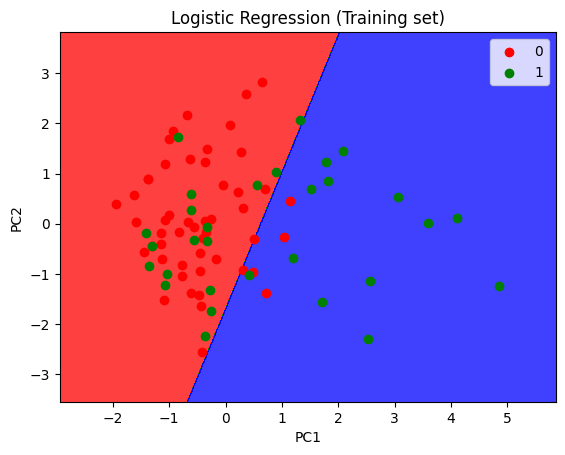

In [28]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\saif_\AppData\Local\Temp\ipykernel_4972\3946207957.py:10: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



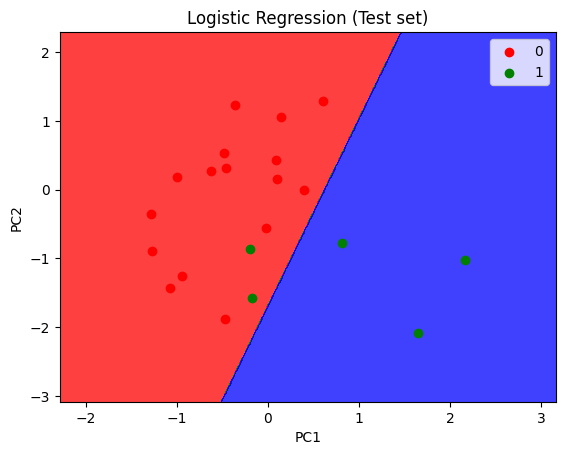

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()